### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [3]:
keeper_data = pd.read_csv("keepers_list.csv")

In [4]:
keeper_data.head()

,Player,Pos,Age,Match_Played,Starts,Minutes_Played,shots_on_targets_against,Saves,Save %,Win,Draw,Loss,Clean_Sheet,Clean_Sheet %
0,Emiliano Martinez,GK,29,7,7,690,13,6,53.8,4,2,1,3,42.9
1,Hugo Lloris,GK,35,6,6,570,24,17,83.3,5,1,0,1,16.7
2,Steve Mandanda,GK,37,1,1,90,3,2,66.7,0,0,1,0,0.0
3,Dominik Livakovict,GK,27,7,7,690,31,24,80.6,2,4,1,2,28.6
4,Yassine Bounou,GK,31,6,6,570,11,7,54.5,2,2,2,3,50.0


In [5]:
print(keeper_data.describe())

             Age  Match_Played     Starts  Minutes_Played  \
count  41.000000     41.000000  41.000000       41.000000   
mean   30.073171      3.195122   3.121951      288.024390   
std     3.894806      1.600305   1.691081      163.458326   
min    22.000000      1.000000   0.000000       11.000000   
25%    28.000000      2.000000   2.000000      175.000000   
50%    30.000000      3.000000   3.000000      270.000000   
75%    33.000000      4.000000   4.000000      360.000000   
max    37.000000      7.000000   7.000000      690.000000   

       shots_on_targets_against      Saves      Save %        Win       Draw  \
count                 41.000000  41.000000   41.000000  41.000000  41.000000   
mean                  12.243902   7.975610   66.070732   1.195122   0.731707   
std                    7.582152   5.707398   17.560200   1.187845   0.866729   
min                    0.000000   0.000000    0.000000   0.000000   0.000000   
25%                    6.000000   4.000000   54.50

In [6]:
print(keeper_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    41 non-null     object 
 1   Pos                       41 non-null     object 
 2   Age                       41 non-null     int64  
 3   Match_Played              41 non-null     int64  
 4   Starts                    41 non-null     int64  
 5   Minutes_Played            41 non-null     int64  
 6   shots_on_targets_against  41 non-null     int64  
 7   Saves                     41 non-null     int64  
 8   Save %                    41 non-null     float64
 9   Win                       41 non-null     int64  
 10  Draw                      41 non-null     int64  
 11  Loss                      41 non-null     int64  
 12  Clean_Sheet               41 non-null     int64  
 13  Clean_Sheet %             40 non-null     float64
dtypes: float64(2

In [7]:
# Check for any missing values in the dataset
print(keeper_data.isnull().sum())

Player                      0
Pos                         0
Age                         0
Match_Played                0
Starts                      0
Minutes_Played              0
shots_on_targets_against    0
Saves                       0
Save %                      0
Win                         0
Draw                        0
Loss                        0
Clean_Sheet                 0
Clean_Sheet %               1
dtype: int64


In [8]:
keeper_data[keeper_data['Save %'].isnull()]

,Player,Pos,Age,Match_Played,Starts,Minutes_Played,shots_on_targets_against,Saves,Save %,Win,Draw,Loss,Clean_Sheet,Clean_Sheet %


In [9]:
keeper_data.columns

Index(['Player', 'Pos', 'Age', 'Match_Played', 'Starts', 'Minutes_Played',
       'shots_on_targets_against', 'Saves', 'Save %', 'Win', 'Draw', 'Loss',
       'Clean_Sheet', 'Clean_Sheet %'],
      dtype='object')

In [10]:
# Replace missing Save% values with 0
keeper_data['Save %'].fillna(0, inplace=True)

In [14]:
# Confirm that there are no missing values in the Save% column
keeper_data[keeper_data['Save %'].isnull()]

,Player,Pos,Age,Match_Played,Starts,Minutes_Played,shots_on_targets_against,Saves,Save %,Win,Draw,Loss,Clean_Sheet,Clean_Sheet %


In [11]:
# Replace missing clean_sheet% values with 0
keeper_data['Clean_Sheet %'].fillna(0, inplace=True)

In [12]:
# Confirm that there are no missing values in the clean_sheet%  column
keeper_data[keeper_data['Clean_Sheet %'].isnull()]

,Player,Pos,Age,Match_Played,Starts,Minutes_Played,shots_on_targets_against,Saves,Save %,Win,Draw,Loss,Clean_Sheet,Clean_Sheet %


In [13]:
keeper_data

,Player,Pos,Age,Match_Played,Starts,Minutes_Played,shots_on_targets_against,Saves,Save %,Win,Draw,Loss,Clean_Sheet,Clean_Sheet %
0,Emiliano Martinez,GK,29,7,7,690,13,6,53.8,4,2,1,3,42.9
1,Hugo Lloris,GK,35,6,6,570,24,17,83.3,5,1,0,1,16.7
2,Steve Mandanda,GK,37,1,1,90,3,2,66.7,0,0,1,0,0.0
3,Dominik Livakovict,GK,27,7,7,690,31,24,80.6,2,4,1,2,28.6
4,Yassine Bounou,GK,31,6,6,570,11,7,54.5,2,2,2,3,50.0
5,Munir,GK,33,1,1,90,3,3,100.0,1,0,0,1,100.0
6,Andries Noppert,GK,28,5,5,480,22,18,86.4,3,2,0,2,40.0
7,Jordan Pickford,GK,28,5,5,450,11,7,72.7,3,1,1,3,60.0
8,Alisson,GK,29,4,4,379,7,5,71.4,3,1,0,2,50.0
9,Ederson,GK,28,1,1,90,3,2,66.7,0,0,1,0,0.0


In [14]:
keeper_data.to_csv("final_keepers_list.csv")

### Data Analysis

In [15]:
# Get the number of goalkeepers with a Save percentage greater than 70%
above_70_save_percent = keeper_data[keeper_data['Save %'] > 70].count()['Player']
print(f"Number of goalkeepers with Save % above 70: {above_70_save_percent}")

Number of goalkeepers with Save % above 70: 17


In [16]:
# Get the number of goalkeepers with a Save percentage greater than 70% and more than 2 matches played
above_70_save_percent = keeper_data[(keeper_data['Save %'] > 70) & (keeper_data['Match_Played'] > 2)].count()['Player']
print(f"Number of goalkeepers with Save % above 70 and more than 2 matches played: {above_70_save_percent}")

Number of goalkeepers with Save % above 70 and more than 2 matches played: 13


In [17]:
# Get the goalkeepers with Save% above 70 and more than 2 matches played
goalkeepers = keeper_data[(keeper_data['Save %'] > 70) & (keeper_data['Match_Played'] > 2)]

# Sort the goalkeepers by Save% in descending order
sorted_goalkeepers = goalkeepers.sort_values(by='Save %', ascending=False)

# Print the names of the goalkeepers
print("Goalkeepers with Save % above 70 and more than 2 matches played, ordered by Save%:")
print("Rank | Player Name          | Save%")
print("-----|----------------------|-------")
for i, (index, row) in enumerate(sorted_goalkeepers.iterrows(), 1):
    name = row['Player']
    save_percent = row['Save %']
    print(f"{i:4d} | {name:20s} | {save_percent:6.1f}")


Goalkeepers with Save % above 70 and more than 2 matches played, ordered by Save%:
Rank | Player Name          | Save%
-----|----------------------|-------
   1 | Aimen Dahmen         |   90.0
   2 | Andries Noppert      |   86.4
   3 | Sergio Rochet        |   85.7
   4 | Shaichi Gonda        |   84.2
   5 | Hugo Lloris          |   83.3
   6 | Wojciech Szczęsny    |   82.1
   7 | Thibaut Courtois     |   81.8
   8 | Dominik Livakovict   |   80.6
   9 | Mohammed Al-Owais    |   78.9
  10 | Matt Turner          |   75.0
  11 | Jordan Pickford      |   72.7
  12 | Kasper Schmeichel    |   72.7
  13 | Alisson              |   71.4


In [18]:
# Calculate the average age
average_age = keeper_data['Age'].mean()

# Print the average age
print(f"Average age of goalkeepers: {average_age:.2f}")

Average age of goalkeepers: 30.07


In [19]:
# Sort the data by the clean_sheet column in descending order
top_5_clean_sheet = keeper_data.sort_values(by='Clean_Sheet', ascending=False).head(5)

# Print the top 5 goalkeepers with the highest clean_sheet values
print("Rank | Player Name | Clean Sheet %")
print("-----|----------------------|--------------")
for i, (index, row) in enumerate(top_5_clean_sheet.iterrows(), 1):
    name = row['Player']
    clean_sheet_percent = row['Clean_Sheet %']
    print(f"{i:4d} | {name:20s} | {clean_sheet_percent:6.1f}")

Rank | Player Name | Clean Sheet %
-----|----------------------|--------------
   1 | Emiliano Martinez    |   42.9
   2 | Yassine Bounou       |   50.0
   3 | Jordan Pickford      |   60.0
   4 | Aimen Dahmen         |   66.7
   5 | Matt Turner          |   50.0


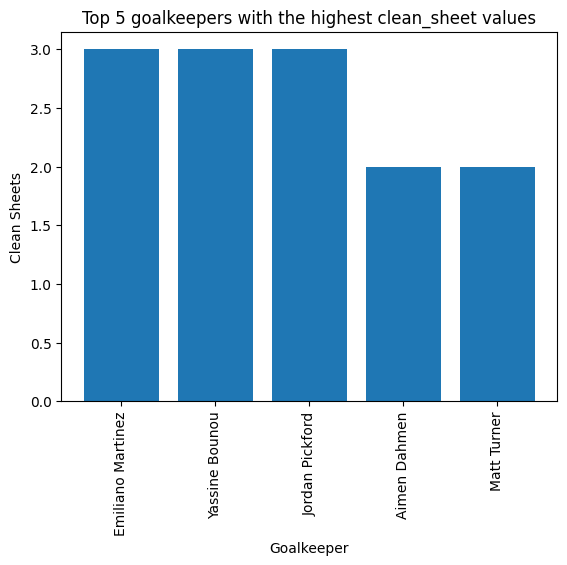

In [20]:

# Plot the top 5 goalkeepers with the highest clean_sheet values
plt.bar(top_5_clean_sheet['Player'], top_5_clean_sheet['Clean_Sheet'])
plt.xlabel('Goalkeeper')
plt.ylabel('Clean Sheets')
plt.title('Top 5 goalkeepers with the highest clean_sheet values')
plt.xticks(rotation=90)
plt.show()